In [1]:
import tensorflow as tf

# from fg import freeze_graph

import numpy as np
from mnist import MNIST

mndata = MNIST('data/gzip')
#This will load the train and test data
X_train, y_train = mndata.load('data/gzip/emnist-byclass-train-images-idx3-ubyte',
                               'data/gzip/emnist-byclass-train-labels-idx1-ubyte')
X_test, y_test = mndata.load('data/gzip/emnist-byclass-test-images-idx3-ubyte',
                             'data/gzip/emnist-byclass-test-labels-idx1-ubyte')

# Convert data to numpy arrays and normalize images to the interval [0, 1]
X_train = np.array(X_train) / 255.0
y_train = np.array(y_train)
X_test = np.array(X_test) / 255.0
y_test = np.array(y_test)

In [2]:
#Reshaping all images into 28*28 for pre-processing
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28)

In [3]:
from matplotlib import pyplot as plt
#Display a random image
plt.imshow(X_train[0])
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
#Y'all can see how an image array looks like. all float values b/w 0 and 1
m = X_train[2]
print(m)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Process Complete: Rotated and reversed test and train images!


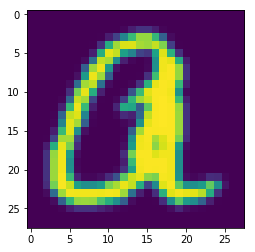

In [5]:
#for train data
for t in range(697932):
    X_train[t]=np.transpose(X_train[t])
    
#checking
plt.imshow(X_train[0])
plt.show

#for test data  
for t in range(116323):
    X_test[t]=np.transpose(X_test[t])

#checking
plt.imshow(X_test[1])
plt.show

print('Process Complete: Rotated and reversed test and train images!')

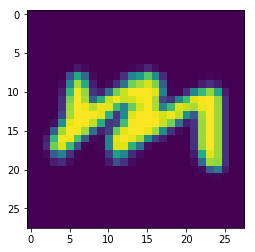

In [6]:
#Checking the last train image, just to be sure!
m = X_train[697931]
plt.imshow(m)
plt.show()

In [7]:
X_train = X_train.reshape(X_train.shape[0], 784,1)
X_test = X_test.reshape(X_test.shape[0], 784,1)

In [8]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense, Reshape, LSTM
from keras import backend as K
from keras.constraints import maxnorm

def resh(ipar):
    opar = []
    for image in ipar:
        opar.append(image.reshape(-1))
    return np.asarray(opar)

from keras.utils import np_utils

train_images = X_train.astype('float32')
test_images = X_test.astype('float32')

train_images = resh(train_images)
test_images = resh(test_images)


train_labels = np_utils.to_categorical(y_train, 62)
test_labels = np_utils.to_categorical(y_test, 62)


K.set_learning_phase(1)

model = Sequential()

model.add(Reshape((28,28,1), input_shape=(784,)))

#add the layer below for an accuracy of 89%.(Training time - over 20 hours)
model.add(Convolution2D(32, (5,5), input_shape=(28,28,1),
                             activation='relu',padding='same',
                            kernel_constraint=maxnorm(3)))

model.add(Convolution2D(32, (5,5),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))

model.add(Dropout(0.5))

model.add(Dense(62, activation='softmax'))

# opt = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
# opt = optimizers.Adadelta()
opt = optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
print(model.summary())
history = model.fit(train_images,train_labels,validation_data=(test_images, test_labels), batch_size=128, epochs=20)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              4719616   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
__________

In [10]:
scores = model.evaluate(test_images,test_labels, verbose = 0)
print("Accuracy: %.2f%%"%(scores[1]*100))

Accuracy: 84.89%


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


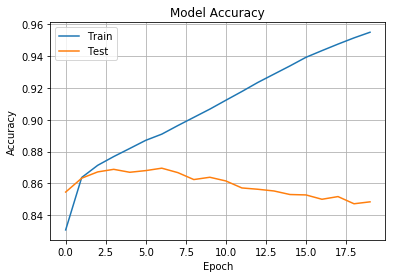

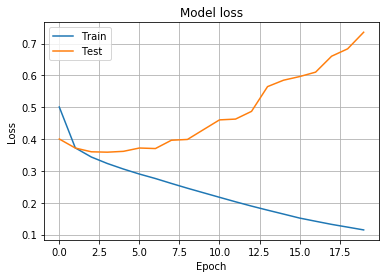

In [11]:

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()

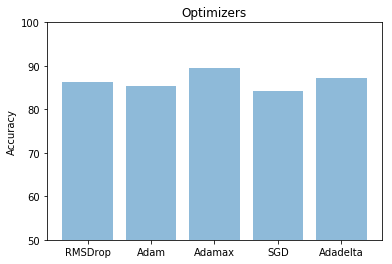

In [12]:
objects = ('RMSDrop', 'Adam', 'Adamax', 'SGD', 'Adadelta')
y_pos = np.arange(len(objects))
performance = [86.2,85.39,89.53,84.29,87.11]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Optimizers')
plt.ylim(50,100)
plt.show()